In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from subprocess import check_output

In [27]:
data = pd.read_csv('./train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17176 entries, 0 to 17175
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     17176 non-null  int64  
 1   additional_fare            16974 non-null  float64
 2   duration                   16974 non-null  float64
 3   meter_waiting              16974 non-null  float64
 4   meter_waiting_fare         16974 non-null  float64
 5   meter_waiting_till_pickup  16974 non-null  float64
 6   pickup_time                17176 non-null  object 
 7   drop_time                  17176 non-null  object 
 8   pick_lat                   17176 non-null  float64
 9   pick_lon                   17176 non-null  float64
 10  drop_lat                   17176 non-null  float64
 11  drop_lon                   17176 non-null  float64
 12  fare                       17039 non-null  float64
 13  label                      17176 non-null  obj

In [30]:
data = data.dropna()

mapping = {'correct': 1, 'incorrect': 0}
data = data.replace({'label': mapping})

train_y = data.label

list = ['tripid', 'pickup_time', 'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'label']
train_x = data.drop(list, axis=1)
train_x.head(10)

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare
0,10.5,834.0,56.0,0.0000,64.0,270.32
1,10.5,791.0,47.0,0.0000,134.0,197.85
2,10.5,1087.0,80.0,0.0000,61.0,301.64
3,10.5,598.0,271.0,15.6638,68.0,82.30
5,10.5,3407.0,182.0,0.0000,112.0,1065.02
6,10.5,1246.0,487.0,0.0000,133.0,266.62
7,10.5,1333.0,295.0,17.1985,212.0,318.05
8,10.5,360.0,80.0,4.6640,3.0,100.32
9,10.5,1539.0,588.0,33.9864,43.0,257.89
10,10.5,26.0,19.0,0.0000,73.0,694.37


In [31]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16968 entries, 0 to 17175
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            16968 non-null  float64
 1   duration                   16968 non-null  float64
 2   meter_waiting              16968 non-null  float64
 3   meter_waiting_fare         16968 non-null  float64
 4   meter_waiting_till_pickup  16968 non-null  float64
 5   fare                       16968 non-null  float64
dtypes: float64(6)
memory usage: 927.9 KB


correct:  15442
incorrect:  1526


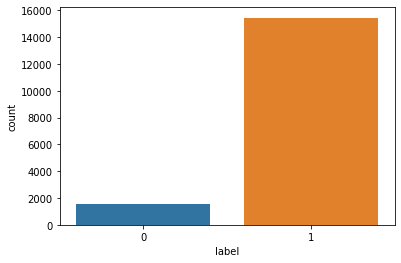

In [32]:
ax = sns.countplot(train_y, label="Count")
correct, incorrect = train_y.value_counts()
print("correct: ", correct)
print("incorrect: ", incorrect)

In [33]:
train_x.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare
count,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000
mean,13.721437,1702.836987,628.875000,32.045122,112.489510,312.657884
std,98.992493,8121.556167,8064.657846,465.564240,442.129943,606.372103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.500000,548.000000,33.000000,0.000000,26.000000,125.500000
50%,10.500000,1009.000000,123.000000,0.115600,73.000000,211.050000
75%,10.500000,1802.250000,351.000000,14.334400,144.000000,366.205000
max,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,26945.990000


In [34]:
drop_list = ['meter_waiting_fare']
train_x = train_x.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
train_x.head()

,additional_fare,duration,meter_waiting,meter_waiting_till_pickup,fare
0,10.5,834.0,56.0,64.0,270.32
1,10.5,791.0,47.0,134.0,197.85
2,10.5,1087.0,80.0,61.0,301.64
3,10.5,598.0,271.0,68.0,82.30
5,10.5,3407.0,182.0,112.0,1065.02


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=40)      
clr_rf = clf_rf.fit(train_x,train_y)


In [36]:
test_x = pd.read_csv("./test.csv")
drop_list2 = ['tripid', 'meter_waiting_fare', 'pickup_time', 'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon']
test_x = test_x.drop(drop_list2, axis=1)
# test_x.head()

pred_y = clr_rf.predict(test_x)

pred_result = pd.read_csv("sample_submission.csv")
pred_result["prediction"] = pred_y

pred_result.to_csv("prediction.csv", index=False)
